In [1]:
# Standard modules
import sys
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("../..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

You can run simstack three ways:
1. **In a Jupyter Notebook, as this example will demonstrate**
  - Not recommended for complex stacks such as this one.  
2. Command line.  
    - From the command line (in the simstack environement, i.e.; conda activate simstack) type:
       - python run_simstack_cmd_line.py config/cosmos2020_farmer.ini 
3. IDE.
     - Confirm that line 59 of file run_simstack_cmd_line.py has the correct config file (default is example.ini, change that to cosmos_farmer.ini).
     - From PyCharm (or whatever you prefer) configure to use the simstack environment and Run.


In [2]:
# Define Path to configuration file
path_ini_file = os.path.join("..","config","cosmos2020_farmer.ini")

# WAIT!
Stacking the full bootstrap will take a long time on a powerful computer.  If you just want the Viero2022 result you can download the pickle [here](https://sites.astro.caltech.edu/viero/viero2022/data/pickles/cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_bootstrap_1-150/mcmc_samples_15000-3000-3sigma_mixed_prior_qt_dict.pkl).

Put it in your pickle path and you are good to continue.  

In [3]:
# Use SimstackWrapper to read in config file and perform stack.
simstack_object = SimstackWrapper(path_ini_file, read_maps=True, read_catalog=True, stack_automatically=True)

Bootstrapping 5 iterations starting at 1
stacked_flux_densities
Simultaneously Stacking 41 Layers in spire_psw
Simultaneously Stacking 41 Layers in spire_plw
bootstrap_flux_densities_1
Simultaneously Stacking 81 Layers in spire_psw
Simultaneously Stacking 81 Layers in spire_plw
bootstrap_flux_densities_2
Simultaneously Stacking 81 Layers in spire_psw
Simultaneously Stacking 81 Layers in spire_plw
bootstrap_flux_densities_3
Simultaneously Stacking 81 Layers in spire_psw
Simultaneously Stacking 81 Layers in spire_plw
bootstrap_flux_densities_4
Simultaneously Stacking 81 Layers in spire_psw
Simultaneously Stacking 81 Layers in spire_plw
bootstrap_flux_densities_5
Simultaneously Stacking 81 Layers in spire_psw
Simultaneously Stacking 81 Layers in spire_plw
pickling to D:\pickles\simstack\stacked_flux_densities\uVista_DR2_example_uvj_1_1p5_2_2p5_3_4p0_X_4_foregnd_atonce_bootstrap_1-5__\uVista_DR2_example_uvj_1_1p5_2_2p5_3_4p0_X_4_foregnd_atonce_bootstrap_1-5.pkl
Removing maps_dict
saved to 

While stacking it will print the layer in progress so you can keep track.   
When stacking is complete it will print where the results are saved.  

### Stacking Complete.  Inspect Results

In [4]:
# Import catalog with SimstackWrapper
simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)

In [5]:
# Pass simstack_object into SimstackResults to transform raw data into plots
simstack_object = SimstackResults(simstack_object)

In [6]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [7]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

In [8]:
sed_results_dict = simstack_object.results_dict['sed_bootstrap_results_dict']

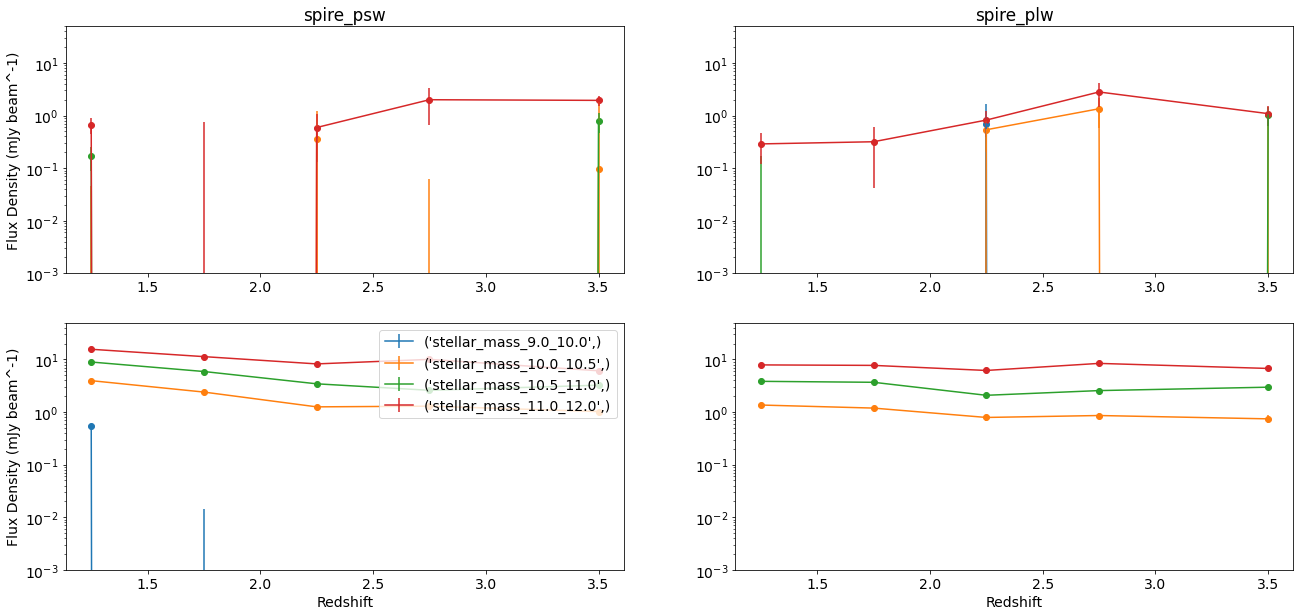

In [9]:
# Plot Flux Densities vs. Redshift in each band (Top Row Quiescent, Bottom Row Star-Forming)
simstack_object.plot_flux_densities()

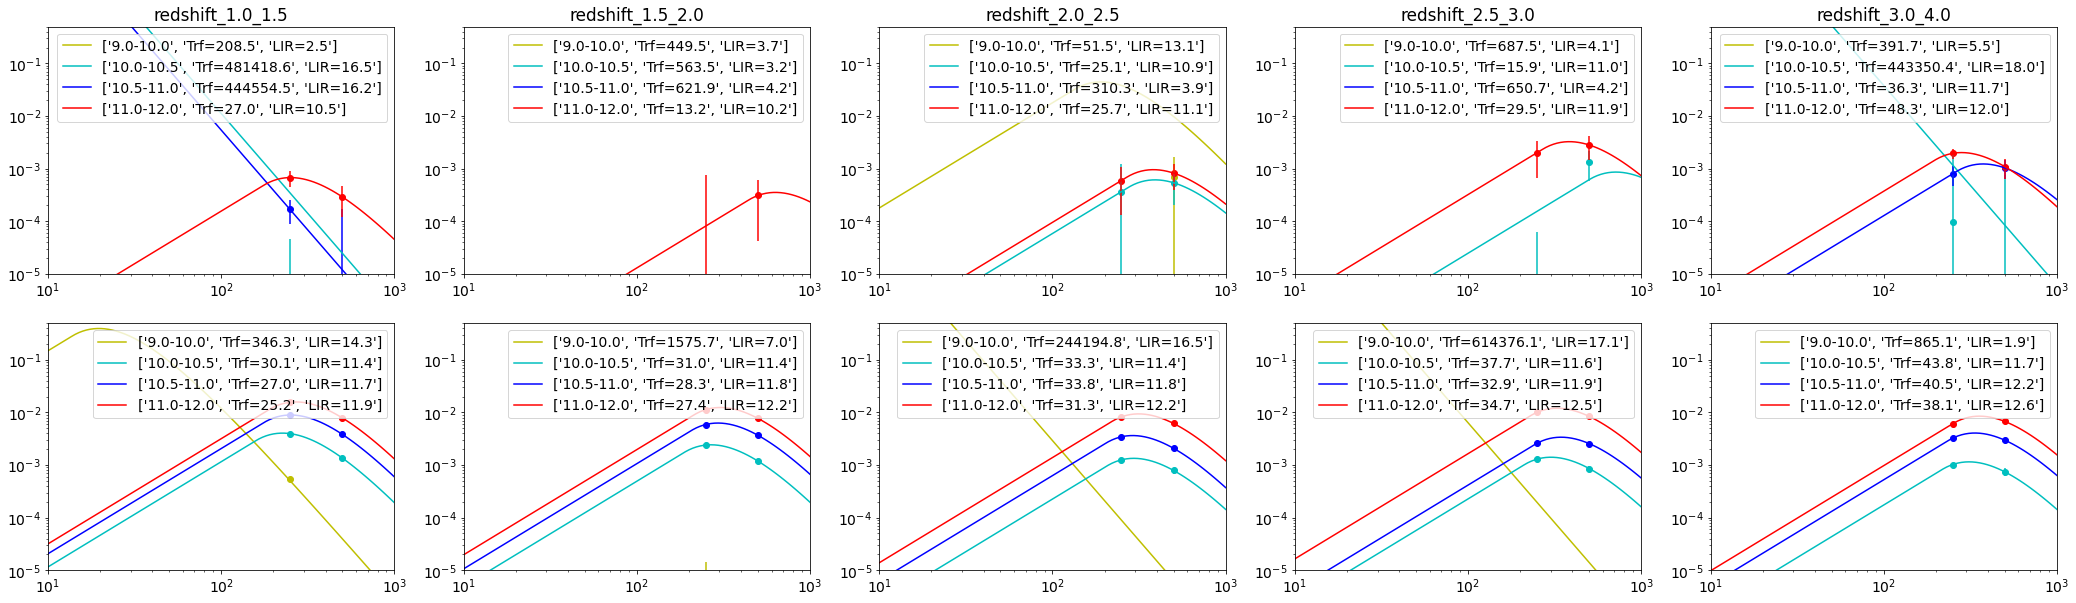

In [10]:
# Plot SEDs at each redshift
simstack_object.plot_seds(sed_results_dict)

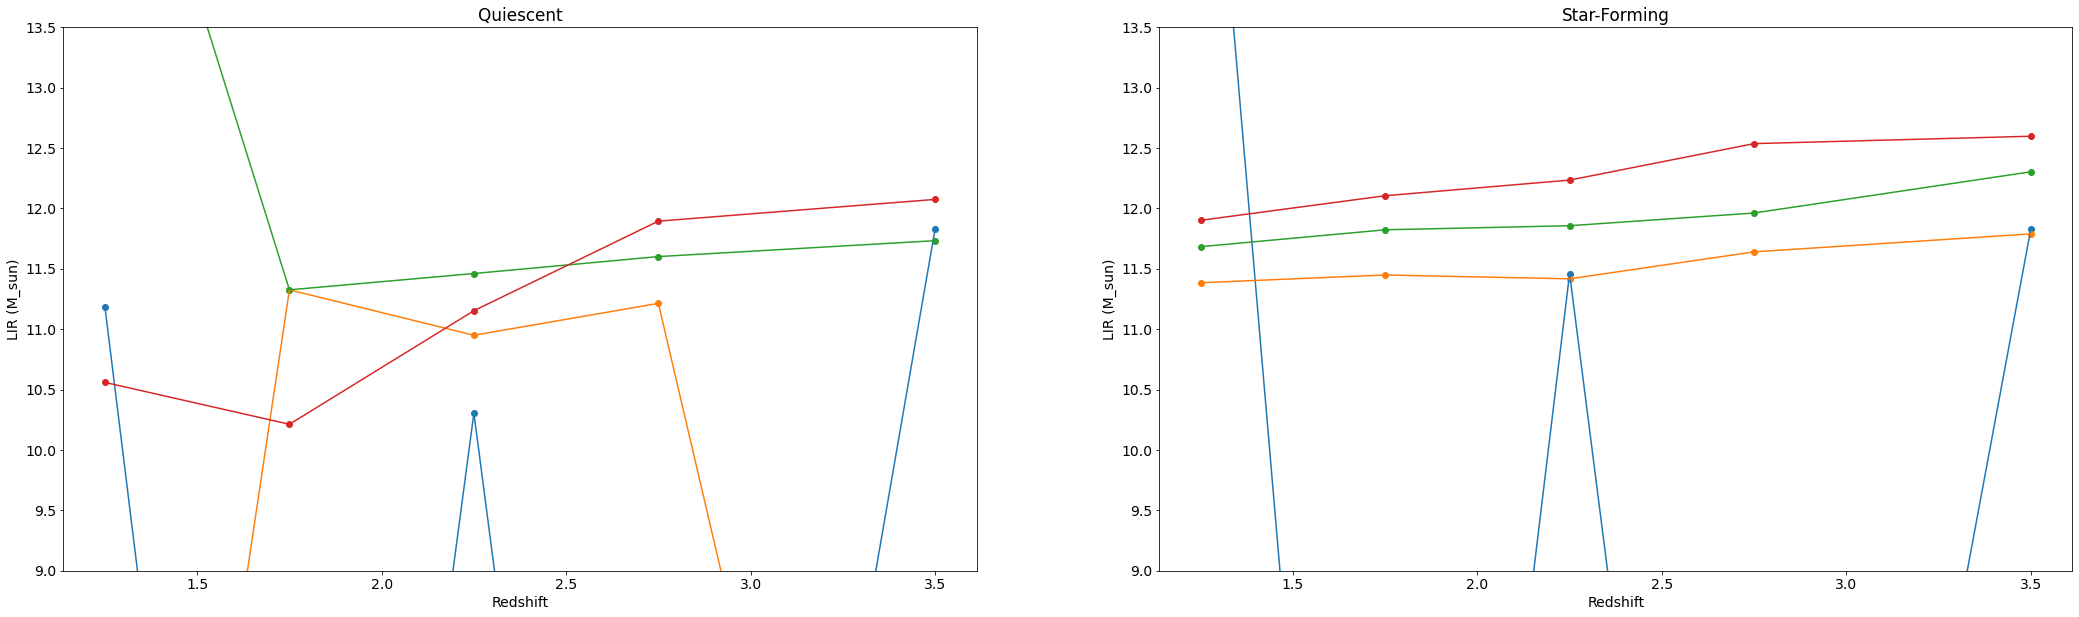

In [11]:
# Plot LIR vs z. 
simstack_object.plot_lir_vs_z()